# Python 을 이용해서 MongoDB에 test.txt 파일을 저장 및 읽기

In [1]:
#필요한 라이브러리를 임포트한다. 
from pymongo import MongoClient  
from gridfs import GridFS
from bson import objectid


Database인 Mongodb에 새로운 데이터 베이스 설정해주기, 이름은, python_test

In [2]:
db = MongoClient().python_test     # 데이터 베이스가 잘 설정되면, CMD창에서 확인해볼수 있다. 
                                 # 창경로 : Mongodb있는경로 > mongo

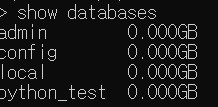

In [4]:
fs= GridFS(db) #python_test에 파일을 저장할 객체 생성

In [6]:
# 파일을 읽을 객체 f를 생성하기
with open ("C:/AI/workspace/mongodb/test.txt", 'rb') as f:
    fs.put(f, filename = "test.txt")
    # f를 통해 데이터를 읽은후, fs(궁극적으로 GridFS)에 저장하기 

In [7]:
db.fs.files.find()

In [8]:
list(db.fs.files.find()) #CMD 창에서도 같은 명령어로 확인해볼 수 있다. 

[{'_id': ObjectId('608f8550649d3b3cb4ba5a4d'),
  'filename': 'test.txt',
  'md5': 'dd18bf3a8e0a2a3e53e2661c7fb53534',
  'chunkSize': 261120,
  'length': 8,
  'uploadDate': datetime.datetime(2021, 5, 3, 5, 8, 32, 754000)},
 {'_id': ObjectId('608f862fffdc41ec3e33d355'),
  'filename': 'test.txt',
  'md5': 'dd18bf3a8e0a2a3e53e2661c7fb53534',
  'chunkSize': 261120,
  'length': 8,
  'uploadDate': datetime.datetime(2021, 5, 3, 5, 12, 15, 138000)},
 {'_id': ObjectId('608f867fffdc41ec3e33d357'),
  'filename': 'upload image',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': 'adb37ae4222287a5840397277e9a1613',
  'length': 87449,
  'uploadDate': datetime.datetime(2021, 5, 3, 5, 13, 37, 500000)},
 {'_id': ObjectId('608fa61c9bc46fdd0461b6af'),
  'filename': 'test.txt',
  'md5': 'b184694dac0c98bc0719ce9073f8fbad',
  'chunkSize': 261120,
  'length': 30,
  'uploadDate': datetime.datetime(2021, 5, 3, 7, 28, 28, 152000)},
 {'_id': ObjectId('608fa6899bc46fdd0461b6b1'),
  'filena

In [9]:
f= fs.get_last_version(filename="test.txt")

In [10]:
data= f.read()     # 아래 보이는 내용은 test.txt파일에 있는 자료.
data

b'This is test file for mongodb '

In [12]:
# 만약, 데이터 가 한글로 되어있는 경우, utf-8으로 인코딩하여 줄력하기.
#data.decode('utf-8')

# Python을 이용한 MOngoDB 이미지 파일 저장

In [28]:
from pymongo import MongoClient  
from gridfs import GridFS
from bson import objectid
from gridfs import GridFSBucket  # 위에서 임포트한 라이브러리보다, 마지막 한개가 추가되었다.
import urllib.request  #이미지를 불러오기위해서 필요한 라이브러리

In [29]:
db=MongoClient().python_test
fs= GridFS(db)   #위와 같은 방식

In [30]:
#다운받을 이미지 url 가져오기.
url = "https://postfiles.pstatic.net/20151102_227/492466_1446457731359RwtYg_PNG/2.png?type=w2"

In [35]:
 # 이미지경로에서 타입부분을 가져오기, 
image_type= url.split(".")[-1]    # 이미지 타입, png 뒤에서 부터 쉽게 분리하기.
pic_type = "image/{}".format(image_type)
pic_type

image_name= url.split("/")[-1]

In [32]:
image = urllib.request.urlopen(url).read()
 # 이미지의 내용을 읽어서 image에 저장하기, 이미파일은 숫자나 글로 표현가능.

In [41]:
bucket =GridFSBucket(db) #이미지 파일을 저장할 객체 생성하기 
grid_in = bucket.open_upload_stream(image_name, metadata= {"Content_Type":image_type })
                            # 파일을 GridFs에 저장할 객체 생성하기 
grid_in.write(image)#이미지 내용을 GridFS 에 저장 

In [40]:
grid_in.close()   # 이미지 저장 종료하기